# Handwritten Digit Recognition using Support Vector Machine

I have performed Data Analysis using Python to accept or reject the hypothesis : " Scientist claims that the Digits data set of scikit-learn library predicts the digit accurately 95% of the times " 

In [1]:
# Data manipulation
import pandas as pd

# Plotting
import seaborn as sn
import matplotlib.pyplot as plt

# Building model
from sklearn import svm

# Loading dataset
from sklearn.datasets import load_digits

# Splitting data to test and train
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Loading the data
digits=load_digits()

# Exploring the digits data 
print(dir(digits))
print("Type :",type(digits))
print("Shape :",digits.data.shape)


['DESCR', 'data', 'images', 'target', 'target_names']
Type : <class 'sklearn.utils.Bunch'>
Shape : (1797, 64)


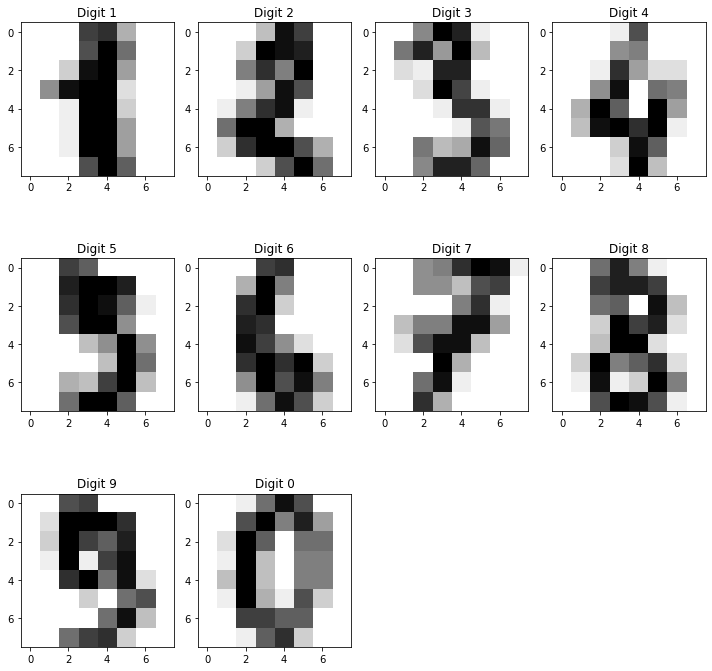

In [3]:
# Plotting all the digits from data set
plt.rcParams["figure.figsize"]=10,10
fig=plt.figure()
axes=[]
for i in range(1,11):
    axes.append( fig.add_subplot(3,4,i) )
    subplot_title=("Digit "+str(i%10))
    axes[-1].set_title(subplot_title)  
    plt.imshow(digits.images[i],interpolation='nearest',cmap=plt.cm.gray_r)
fig.tight_layout()    
plt.show()

In [4]:
# Exploring the images data 
print(digits.images[1])
print("Images size :",digits.images.size)

# Exploring the target data 
print("Target :",digits.target)
print("Target size :",digits.target.size)
print("Target names :",digits.target_names)

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
Images size : 115008
Target : [0 1 2 ... 8 9 8]
Target size : 1797
Target names : [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Generating dataframe
df=pd.DataFrame(data=digits.data)

# Adding target column into dataframe
df["Target"]=digits.target
print("Shape :",df.shape)
df.head()

Shape : (1797, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# Test Case 1
Using default SVC classifier which implies Radius Basis Function(rbf) Kernel 

In [6]:
# Define X and y
X=df.drop(['Target'],axis=1)
y=df["Target"]

#Splitting dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [7]:
# Generating the model
svc = svm.SVC()

# Training the model
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# Predicting the response
pred=svc.predict(X_test)

# Calculating accuracy
score = accuracy_score(y_test,pred)
print("Accuracy Score : {}%".format(round(score*100,2)))

Accuracy Score : 99.17%


Text(0.5, 51.0, 'Predicted Label')

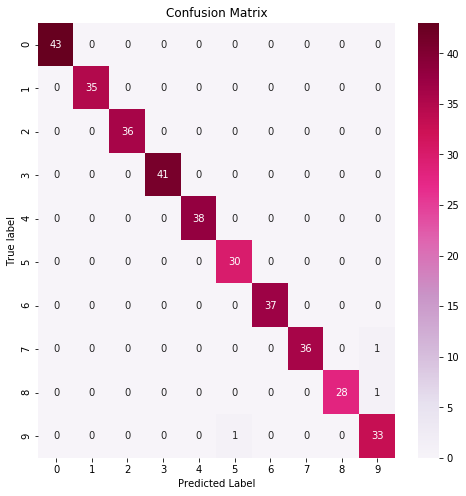

In [9]:
# Build Confusion matrix
cf_matrix = confusion_matrix(y_test,pred)

# Visualize Confusion matrix using heatmap
plt.rcParams["figure.figsize"]=8,8
heat_map=sn.heatmap(cf_matrix,annot=True,fmt='',cmap='PuRd')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

# Test Case 2
Using Linear Kernel

In [10]:
# Generating the model
svc = svm.SVC(kernel='linear')

# Training the model
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
# Predicting the response
pred=svc.predict(X_test)

# Calculating accuracy
score = accuracy_score(y_test,pred)
print("Accuracy Score : {}%".format(round(score*100,2)))

Accuracy Score : 99.17%


Text(0.5, 51.0, 'Predicted Label')

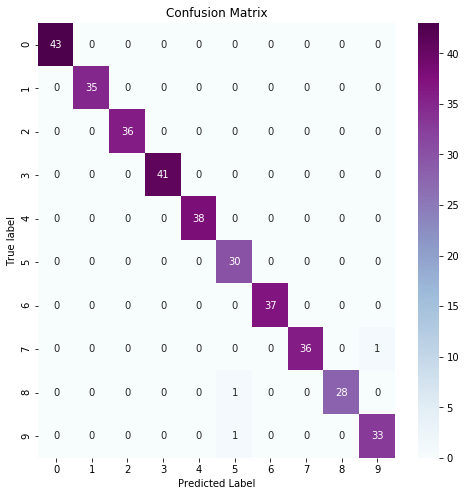

In [12]:
# Build Confusion matrix
cf_matrix = confusion_matrix(y_test,pred)

# Visualize Confusion matrix using heatmap
plt.rcParams["figure.figsize"]=8,8
heat_map=sn.heatmap(cf_matrix,annot=True,fmt='',cmap='BuPu')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

# Test Case 3
Using Polynomial Kernel

In [13]:
# Generating the model
svc = svm.SVC(kernel='poly')

# Training the model
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
# Predicting the response
pred=svc.predict(X_test)

# Calculating accuracy
score = accuracy_score(y_test,pred)
print("Accuracy Score : {}%".format(round(score*100,2)))

Accuracy Score : 98.89%


Text(0.5, 51.0, 'Predicted Label')

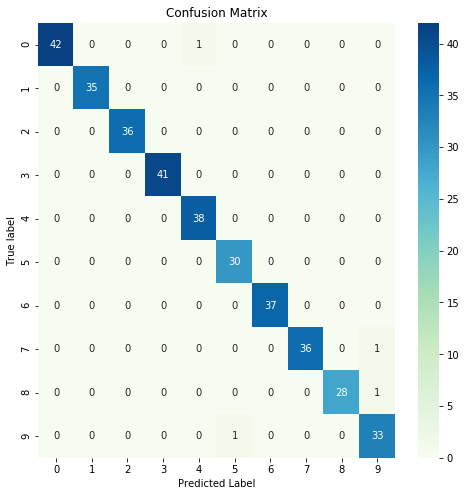

In [15]:
# Build Confusion matrix
cf_matrix = confusion_matrix(y_test,pred)

# Visualize Confusion matrix using heatmap
plt.rcParams["figure.figsize"]=8,8
heat_map=sn.heatmap(cf_matrix,annot=True,fmt='',cmap='GnBu')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

# Test Case 4
Using gamma=0.001 and C=100

In [16]:
# Generating the model
svc = svm.SVC(gamma=0.001,C=100)

# Training the model
svc.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
# Predicting the response
pred=svc.predict(X_test)

# Calculating accuracy
score = accuracy_score(y_test,pred)
print("Accuracy Score : {}%".format(round(score*100,2)))

Accuracy Score : 99.17%


Text(0.5, 51.0, 'Predicted Label')

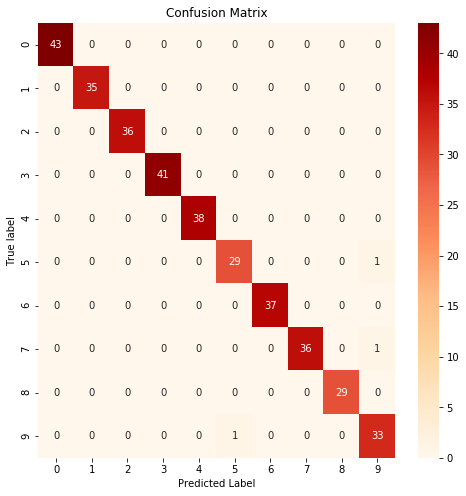

In [18]:
# Build Confusion matrix
cf_matrix = confusion_matrix(y_test,pred)

# Visualize Confusion matrix using heatmap
plt.rcParams["figure.figsize"]=8,8
heat_map=sn.heatmap(cf_matrix,annot=True,fmt='',cmap='OrRd')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

# Test Case 5
Using Sigmoid Kernel

In [19]:
# Generating the model
svc = svm.SVC(kernel='sigmoid')

# Training the model
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Predicting the response
pred=svc.predict(X_test)

# Calculating accuracy
score = accuracy_score(y_test,pred)
print("Accuracy Score : {}%".format(round(score*100,2)))

Accuracy Score : 91.11%


Text(0.5, 51.0, 'Predicted Label')

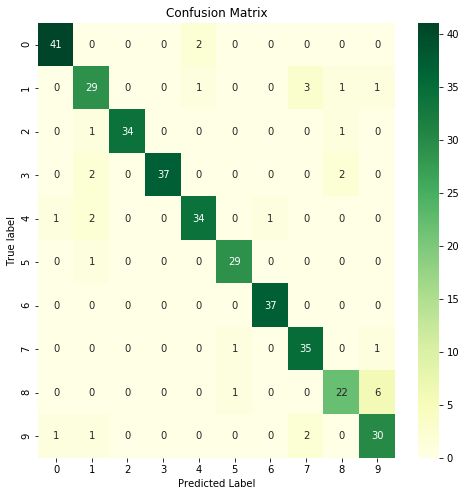

In [21]:
# Build Confusion matrix
cf_matrix = confusion_matrix(y_test,pred)

# Visualize Confusion matrix using heatmap
plt.rcParams["figure.figsize"]=8,8
heat_map=sn.heatmap(cf_matrix,annot=True,fmt='',cmap='YlGn')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted Label')